In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from utils import plotter
import scqubits as scq
import numpy as np

plt.style.use("support-files/qubit-01.mplstyle")

MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}

In [2]:
EJ = 15.0
alpha = 0.6
fluxqubit = scq.FluxQubit(EJ1 = EJ,
                              EJ2 = EJ,
                              EJ3 = alpha*EJ,
                              ECJ1 = 1.0,
                              ECJ2 = 1.0,
                              ECJ3 = 1.0/alpha,
                              ECg1 = 50.0,
                              ECg2 = 50.0,
                              ng1 = 0.0,
                              ng2 = 0.0,
                              flux = 0.5,
                              ncut = 14)

In [3]:
flux_list = np.linspace(0,1,101)
energies = fluxqubit.get_spectrum_vs_paramvals(
    param_name="flux",
    param_vals=flux_list,
    evals_count= 4,
    subtract_ground=False
).energy_table

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


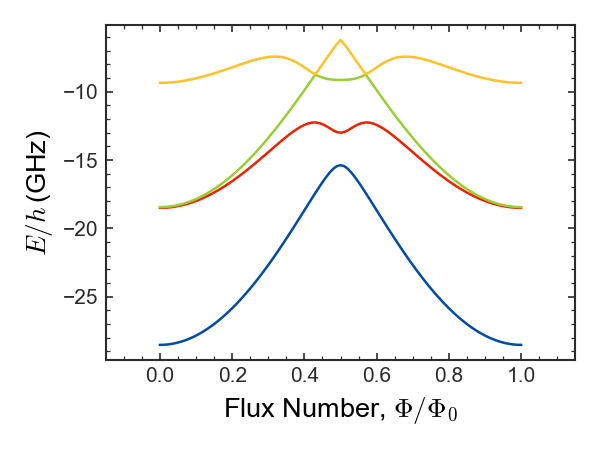

In [41]:
fix, ax = plt.subplots(1, 1, figsize=(4,3))

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['004BA8','ed2200','9acd32','ffc125','79cdcd','6959cd','ffa07a','68838b','EDD3BF','5EE5A2']) 

ax.plot(flux_list, energies[:, 0], 
#         color="C10"
#         color="#9acd32"
#         color=MY_COLOURS["LightBlue"]
#         color=MY_COLOURS["DarkBlue"]
       )
ax.plot(flux_list, energies[:, 1], 
#         color=MY_COLOURS["DarkRed"]
#         color="#104e8b"
       )
ax.plot(flux_list, energies[:, 2], 
#         color=MY_COLOURS["Green"]
       )
ax.plot(flux_list, energies[:, 3], 
#         color="#ffc125"
       )


ax.set_xlabel("Flux Number, $\Phi/\Phi_0$")
ax.set_ylabel("$E/h\,$(GHz)")
# ax.tick_params(axis='x')
# ax.tick_params(axis='y', labelsize=12)

# ax.set_ylim([-120, -70])
ax.set_xlim([-0.15, 1.15])
plt.tight_layout()

In [42]:
plt.savefig(f"output/3jj-flux-qubit.svg", transparent=True)